In [3]:
# default_exp python.syntax.oo

%reload_ext autoreload
%autoreload 2

# python-syntax-oo

https://www.runoob.com/python3/python3-class.html

## 命名规范
类名采用驼峰

类的属性和方法命名使用下划线

## 类定义

In [ ]:
class OldStyle:
    pass
class NewStyle(object):
    pass

## 构造方法`__init__(self)`
该方法在类实例化时会自动调用，

## 继承

In [ ]:
class DerivedClassName(BaseClassName1):
    <statements>

In [11]:
#类定义
class people:
    #定义基本属性
    name = ''
    age = 0
    #定义私有属性,私有属性在类外部无法直接进行访问
    __weight = 0
    #定义构造方法
    def __init__(self,n,a,w):
        self.name = n
        self.age = a
        self.__weight = w
    def speak(self):
        print("%s 说: 我 %d 岁。" %(self.name,self.age))

#单继承示例
class student(people):
    grade = ''
    def __init__(self,n,a,w,g):
        #调用父类的构函
        people.__init__(self,n,a,w)
        self.grade = g
    #覆写父类的方法
    def speak(self):
        print("%s 说: 我 %d 岁了，我在读 %d 年级"%(self.name,self.age,self.grade))
 
 
 
s = student('ken',10,60,3)
s.speak()

ken 说: 我 10 岁了，我在读 3 年级


## 多继承
Python同样有限的支持多继承形式。多继承的类定义形如下例:

需要注意圆括号中父类的顺序，若是父类中有相同的方法名，而在子类使用时未指定，python从左至右搜索 即方法在子类中未找到时，从左到右查找父类中是否包含方法。

In [ ]:
class DerivedClassName(Base1, Base2, Base3):
    <statements>

In [12]:
#类定义
class people:
    #定义基本属性
    name = ''
    age = 0
    #定义私有属性,私有属性在类外部无法直接进行访问
    __weight = 0
    #定义构造方法
    def __init__(self,n,a,w):
        self.name = n
        self.age = a
        self.__weight = w
    def speak(self):
        print("%s 说: 我 %d 岁。" %(self.name,self.age))
 
#单继承示例
class student(people):
    grade = ''
    def __init__(self,n,a,w,g):
        #调用父类的构函
        people.__init__(self,n,a,w)
        self.grade = g
    #覆写父类的方法
    def speak(self):
        print("%s 说: 我 %d 岁了，我在读 %d 年级"%(self.name,self.age,self.grade))
 
#另一个类，多重继承之前的准备
class speaker():
    topic = ''
    name = ''
    def __init__(self,n,t):
        self.name = n
        self.topic = t
    def speak(self):
        print("我叫 %s，我是一个演说家，我演讲的主题是 %s"%(self.name,self.topic))
 
#多重继承
class sample(speaker,student):
    a =''
    def __init__(self,n,a,w,g,t):
        student.__init__(self,n,a,w,g)
        speaker.__init__(self,n,t)
 
test = sample("Tim",25,80,4,"Python")
test.speak()   #方法名同，默认调用的是在括号中排前地父类的方法

我叫 Tim，我是一个演说家，我演讲的主题是 Python


## 方法重写

In [13]:
class Parent:        # 定义父类
   def myMethod(self):
      print ('调用父类方法')
 
class Child(Parent): # 定义子类
   def myMethod(self):
      print ('调用子类方法')
 
c = Child()          # 子类实例
c.myMethod()         # 子类调用重写方法
super(Child,c).myMethod() #用子类对象调用父类已被覆盖的方法

调用子类方法
调用父类方法


## 定义属性|方法和访问控制: 类属性 | 实例属性

### 类的私有属性
`__private_attrs`：两个下划线开头，声明该属性为私有，不能在类的外部被使用或直接访问。在类内部的方法中使用时 `self.__private_attrs`。

In [ ]:
class Chinese:
    nation = 'China' #类属性
    def __init__(self,name):#构造函数
        self.__name = name #实例属性

In [14]:
class JustCounter:
    __secretCount = 0  # 私有变量
    publicCount = 0    # 公开变量
 
    def count(self):
        self.__secretCount += 1
        self.publicCount += 1
        print (self.__secretCount)
 
counter = JustCounter()
counter.count()
counter.count()
print (counter.publicCount)
print (counter.__secretCount)  # 报错，实例不能访问私有变量

1
2
2


AttributeError: 'JustCounter' object has no attribute '__secretCount'

### 类的私有方法
`__private_method`：两个下划线开头，声明该方法为私有方法，只能在类的内部调用 ，不能在类的外部调用。`self.__private_methods`。

In [15]:
class Site:
    def __init__(self, name, url):
        self.name = name       # public
        self.__url = url   # private
 
    def who(self):
        print('name  : ', self.name)
        print('url : ', self.__url)
 
    def __foo(self):          # 私有方法
        print('这是私有方法')
 
    def foo(self):            # 公共方法
        print('这是公共方法')
        self.__foo()
 
x = Site('菜鸟教程', 'www.runoob.com')
x.who()        # 正常输出
x.foo()        # 正常输出
x.__foo()      # 报错

name  :  菜鸟教程
url :  www.runoob.com
这是公共方法
这是私有方法


AttributeError: 'Site' object has no attribute '__foo'

## 使用`__slots__`
https://www.liaoxuefeng.com/wiki/897692888725344/923030542875328

正常情况下，当我们定义了一个class，创建了一个class的实例后，我们可以给该实例绑定任何属性和方法，这就是动态语言的灵活性。先定义class：

In [1]:
class Student(object):
    pass

In [2]:
s = Student()
s.name = 'Michael' # 动态给实例绑定一个属性
s.name

'Michael'

还可以尝试给实例绑定一个方法：

In [4]:
def set_age(self, age): # 定义一个函数作为实例方法
    self.age = age
    
from types import MethodType
s.set_age = MethodType(set_age, s) # 给实例绑定一个方法
s.set_age(25) # 调用实例方法

s.age # 测试结果

25

In [ ]:
但是，给一个实例绑定的方法，对另一个实例是不起作用的

为了给所有实例都绑定方法，可以给class绑定方法：



In [6]:
def set_score(self, score):
    self.score = score
Student.set_score = MethodType(set_score, Student)

In [7]:
s.set_score(50)
s.score

50

通常情况下，上面的set_score方法可以直接定义在class中，但动态绑定允许我们在程序运行的过程中动态给class加上功能，这在静态语言中很难实现。
### 使用__slots__

但是，如果我们想要限制class的属性怎么办？比如，只允许对Student实例添加name和age属性。

为了达到限制的目的，Python允许在定义class的时候，定义一个特殊的__slots__变量，来限制该class能添加的属性：

In [8]:
class Student(object):
    __slots__ = ('name', 'age') # 用tuple定义允许绑定的属性名称

In [9]:
s = Student() # 创建新的实例
s.name = 'Michael' # 绑定属性'name'
s.age = 25 # 绑定属性'age'
s.score = 99 # 绑定属性'score'

AttributeError: 'Student' object has no attribute 'score'

由于'score'没有被放到__slots__中，所以不能绑定score属性，试图绑定score将得到AttributeError的错误。

使用__slots__要注意，__slots__定义的属性仅对当前类起作用，对继承的子类是不起作用的：

In [10]:
class GraduateStudent(Student):
    pass
g = GraduateStudent()
g.score = 9999


## 类的魔法方法
https://blog.csdn.net/qq_39314932/article/details/81088784

https://www.cnblogs.com/seablog/p/7173107.html

In [21]:
class Ab:
    """Ab's doc"""
    pass

In [18]:
type(Ab)  # type()：列出类的类型

type

In [17]:
dir(Ab)  # dir()：列出类的所有方法

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

### `__init__(self[, ...])`
构造器，当一个实例被创建的时候调用的初始化方法

### `__new__(cls[, ...])` 

    1. __new__ 是在一个对象实例化的时候所调用的第一个方法
    2. 它的第一个参数是这个类，其他的参数是用来直接传递给 __init__ 方法
    3. __new__ 决定是否要使用该 __init__ 方法，因为 __new__ 可以调用其他类的构造方法或者直接返回别的实例对象来作为本类的实例，如果 __new__ 没有返回实例对象，则 __init__ 不会被调用
    4. __new__ 主要是用于继承一个不可变的类型比如一个 tuple 或者 string

### `__hash__(self)`
定义当被 hash() 调用时的行为

python3自定义类：重写__eq__和__hash__函数
https://blog.csdn.net/anlian523/article/details/80910808

### `__eq__(self, other)`
定义等于号的行为：x == y 调用 x.__eq__(y)

### `__repr__` 、 `__str__`
Python 定义了__str__()和__repr__()两种方法，__str__()用于显示给用户，而__repr__()用于显示给开发人员

In [27]:
class Student:
    def __init__(self,name):
        self.name = name
 
    def __str__(self):
        return "学生姓名：%s" % self.name
    
    __repr__ = __str__
 
s = Student("xiao")
s

学生姓名：xiao

### `__iter__`、`__next__`

一个容器如果是迭代器，那就必须实现__iter__()方法，这个方法实际上就是返回迭代器本身。接下来重点要实现的就是__next__()方法，因为它决定了迭代的规则

In [28]:
class Fib:
    def __init__(self):
        self.a = 0
        self.b = 1
 
    def __iter__(self):
        return self
 
    def __next__(self):
        self.a ,self.b = self.b,self.a + self.b
        if self.a >10:
            raise StopIteration
        return self.a
for number in Fib():
    print(number)

1
1
2
3
5
8


### `__getitem__()`
若要像list一样按照索引来获取元素，需要实现`__getitem__()`方法

In [35]:
class Fib:
    def __init__(self):
        self.a = 0
        self.b = 1
 
    def __iter__(self):
        return self
 
    def __next__(self):
        self.a ,self.b = self.b,self.a + self.b
        return self.a

    def __getitem__(self, index):
        a = 1
        b = 1
        for num in range(index):
            a, b = b, a + b
        return a

In [36]:
fib = Fib()
fib[5]

8

### `__getattr__(self, name)`
定义当用户试图获取一个不存在的属性时的行为

In [1]:
class Student:
    def __init__(self):
        self.name = "xiaohong"
        
student = Student()
print(student.name)
print(student.score)

xiaohong


AttributeError: 'Student' object has no attribute 'score'

In [6]:
class Student:
    def __init__(self):
        self.name = "xiaohong"
 
    def __getattr__(self,attr):
        if attr == "score":
            return 95
    def hello(self):
        self.aa = 100  # 在普通方法中定义属性
student = Student()
print(student.name)
print(student.score)
print(student.score1)


xiaohong
95
None


In [7]:
student.aa

In [8]:
student.hello()

In [9]:
student.aa

100

### `__setattr__(self, name, value)`
定义当一个属性被设置时的行为

In [4]:
student.__setattr__('w', [1, 3])

In [5]:
student.w

[1, 3]

### 通过实例调用方法：`__call__`
一个对象实例可以有自己的方法和属性，调用实例的方法时可以用个实例名.方法名。但任何类只需要定义一个`__call__()`方法，就可以直接对实例进行调用

In [33]:
class Student:
    def __init__(self):
        self.name = "xiaohong"
 
    def __call__(self,score):
        self.score = score
        print("姓名：%s,分数：%s" % (self.name,self.score))
 
 
student = Student()
student(95)
 
print(callable(Student()))
print(callable([1.2]))

姓名：xiaohong,分数：95
True
False


1. 从上面的结果可以看出，通过`__call__()`方法可以直接对实例进行调用并得到结果，且`__call__()`方法还可以定义参数。对实例进行直接调用就像对一个函数调用一样，完全可以把对象看成函数，把函数看成对象

1. 通过`callable()`函数可以判断一个对象是否为"可调用"对象

### 计算相关

#### `__add__(self, other)`
定义加法的行为：+

## 类的专有属性

In [22]:
Ab.__doc__

"Ab's doc"

In [23]:
Ab.__name__

'Ab'

In [24]:
Ab.__base__

object

In [25]:
Ab.__module__

'__main__'

In [26]:
Ab.__dict__

mappingproxy({'__module__': '__main__',
              '__doc__': "Ab's doc",
              '__dict__': <attribute '__dict__' of 'Ab' objects>,
              '__weakref__': <attribute '__weakref__' of 'Ab' objects>})

## Python 里的规则

[Python 工匠：做一个精通规则的玩家](https://mp.weixin.qq.com/s/ixmwac5s1wi3_-VMbvQ_bQ)

Python 是一门初见简单、深入后愈觉复杂的语言。拿 Python 里最重要的“对象”概念来说，Python 为其定义了多到让你记不全的规则，比如：

定义了 __str__ 方法的对象，就可以使用 str() 函数来返回可读名称

定义了 __next__ 和 __iter__ 方法的对象，就可以被循环迭代

定义了 __bool__ 方法的对象，在进行布尔判断时就会使用自定义的逻辑

熟悉规则，并让自己的代码适应这些规则，可以帮助我们写出更地道的代码，事半功倍的完成工作。下面，让我们来看一个有关适应规则的故事。

### 案例：从两份旅游数据中获取人员名单
某日，在一个主打新西兰出境游的旅游公司里，商务同事突然兴冲冲的跑过来找到我，说他从某合作伙伴那里，要到了两份重要的数据：

所有去过“泰国普吉岛”的人员及联系方式

所有去过“新西兰”的人员及联系方式

In [1]:
users_visited_phuket = [

    {"first_name": "Sirena", "last_name": "Gross", "phone_number": "650-568-0388", "date_visited": "2018-03-14"},

    {"first_name": "James", "last_name": "Ashcraft", "phone_number": "412-334-4380", "date_visited": "2014-09-16"},
]

# 去过新西兰的人员数据

users_visited_nz = [

    {"first_name": "Justin", "last_name": "Malcom", "phone_number": "267-282-1964", "date_visited": "2011-03-13"},

    {"first_name": "Albert", "last_name": "Potter", "phone_number": "702-249-3714", "date_visited": "2013-09-11"},

]

每份数据里面都有着 姓、 名、 手机号码、 旅游时间 四个字段。基于这份数据，商务同学提出了一个（听上去毫无道理）的假设：“去过普吉岛的人，应该对去新西兰旅游也很有兴趣。我们需要从这份数据里，找出那些去过普吉岛但没有去过新西兰的人，针对性的卖产品给他们。

因为原始数据里没有“用户 ID”之类的唯一标示，所以我们只能把“姓名和电话号码完全相同”作为判断是不是同一个人的标准。

### 第一次蛮力尝试
思路很简单，循环遍历每一个去过普吉岛的人，然后看他是否在新西兰的人员名单中

### 尝试使用集合优化函数
如果你对 Python 有所了解的话，那么你肯定知道，Python 里的字典和集合对象都是基于 哈希表（Hash Table） 实现的。判断一个东西是不是在集合里的平均时间复杂度是 O(1)，非常快。

### 对问题的重新思考-差集！！！
让我们来尝试重新抽象思考一下问题的本质。首先，我们有一份装了很多东西的容器 A（普吉岛访问记录），然后给我们另一个装了很多东西的容器 B（新西兰访问记录），之后定义相等规则：“姓名与电话一致”。最后基于这个相等规则，求 A 和 B 之间的“差集”。

### 利用集合的游戏规则
在 Python 中，如果要把某个东西装到集合或字典里，一定要满足一个基本条件：“这个东西必须是可以被哈希（Hashable）的” 。什么是 “Hashable”？

举个例子，Python 里面的所有可变对象，比如字典，就 不是 Hashable 的。当你尝试把字典放入集合中时，会发生这样的错误：
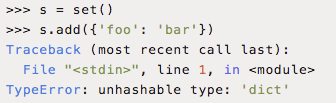

所以，如果要利用集合解决我们的问题，就首先得定义我们自己的 “Hashable” 对象：VisitRecord。而要让一个自定义对象变得 Hashable，唯一要做的事情就是定义对象的 `__hash__` 方法。

In [ ]:
class VisitRecord:
    """旅游记录
    """
    def __init__(self, first_name, last_name, phone_number, date_visited):

        self.first_name = first_name

        self.last_name = last_name

        self.phone_number = phone_number

        self.date_visited = date_visited
    def __hash__(self):
        return hash((self.first_name, self.last_name, self.phone_number))
    
    def __eq__(self, other):
        # 当两条访问记录的名字与电话号相等时，判定二者相等。    
        if isinstance(other, VisitRecord) and hash(other) == hash(self):        
            return True
        return False

一个好的哈希算法，应该让不同对象之间的值尽可能的唯一，这样可以最大程度减少“哈希碰撞”发生的概率，默认情况下，所有 Python 对象的哈希值来自它的内存地址。

在这个问题里，我们需要自定义对象的 __hash__ 方法，让它利用 （姓，名，电话）元组作为 VisitRecord 类的哈希值来源。

自定义完 __hash__ 方法后， VisitRecord 实例就可以正常的被放入集合中了。但这还不够，为了让前面提到的求差值算法正常工作，我们还需要实现 __eq__ 特殊方法。

__eq__ 是 Python 在判断两个对象是否相等时调用的特殊方法。默认情况下，它只有在自己和另一个对象的内存地址完全一致时，才会返回 True。但是在这里，我们复用了 VisitRecord 对象的哈希值，当二者相等时，就认为它们一样。

完成了恰当的数据建模后，之后的求差值运算便算是水到渠成了。新版本的函数只需要一行代码就能完成操作：

In [ ]:
def find_potential_customers_v3():    
    return set(VisitRecord(**r) for r in users_visited_phuket) - set(VisitRecord(**r) for r in users_visited_nz)

### 使用 dataclass 简化代码
故事到这里并没有结束。在上面的代码里，我们手动定义了自己的 数据类 VisitRecord，实现了 __init__、 __eq__ 等初始化方法。但其实还有更简单的做法。

因为定义数据类这种需求在 Python 中实在太常见了，所以在 3.7 版本中，标准库中新增了 dataclasses 模块，专门帮你简化这类工作。

如果使用 dataclasses 提供的特性，我们的代码可以最终简化成下面这样：

不用干任何脏活累活，只要不到十行代码就完成了工作。

In [6]:
from dataclasses import dataclass, field
@dataclass(unsafe_hash=True)
class VisitRecordDC:    
    first_name: str    
    last_name: str    
    phone_number: str    
    # 跳过“访问时间”字段，不作为任何对比条件    
    date_visited: str = field(hash=False, compare=False)

def find_potential_customers_v4():    
    return set(VisitRecordDC(**r) for r in users_visited_phuket) - set(VisitRecordDC(**r) for r in users_visited_nz)

## 使用 __format__ 做对象字符串格式化

In [13]:
class Student:    
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __format__(self, format_spec):        
        if format_spec == 'long':            
            return f'{self.name} is {self.age} years old.'
        elif format_spec == 'simple':            
            return f'{self.name}({self.age})'
        raise ValueError('invalid format spec')




piglei = Student('piglei', '18')

print('{0:simple}'.format(piglei))

print('{0:long}'.format(piglei))

piglei(18)
piglei is 18 years old.


# dataclasses
https://www.cnblogs.com/apocelipes/p/10284346.html

https://docs.python.org/3/library/dataclasses.html

Python 3.7 中将会有许多新东西，最激动人心的新功能之一是 dataclass 装饰器。

This module provides a decorator and functions for automatically adding generated special methods such as `__init__()` and `__repr__()` to user-defined classes. It was originally described in PEP 557.

dataclass的定义位于PEP-557，根据定义一个dataclass是指“一个带有默认值的可变的namedtuple”，广义的定义就是有一个类，它的属性均可公开访问，可以带有默认值并能被修改，而且类中含有与这些属性相关的类方法，那么这个类就可以称为dataclass，

再通俗点讲，__dataclass就是一个含有数据及操作数据方法的容器__。

乍一看可能会觉得这个概念不就是普通的class么，然而还是有几处不同：

* 相比普通class，dataclass通常不包含私有属性，数据可以直接访问
* dataclass的repr方法通常有固定格式，会打印出类型名以及属性名和它的值
* dataclass拥有`__eq__`和`__hash__`魔法方法
* dataclass有着模式单一固定的构造方式，或是需要重载运算符，而普通class通常无需这些工作
* 基于上述原因，通常自己实现一个dataclass是繁琐而无聊的，而dataclass单一固定的行为正适合程序为我们自动生成，于是dataclasses模块诞生了。

配合类型注解语法，我们可以轻松生成一个实现了`__init__`，`__repr__`，`__cmp__`等方法的dataclass：

## api

### 深入dataclass装饰器

In [20]:
from dataclasses import dataclass, field, fields
import dataclasses

In [ ]:
dataclass(
    _cls=None,
    *,
    init=True,  # 指定是否自动生成__init__，如果已经有定义同名方法则忽略这个值，也就是指定为True也不会自动生成
    repr=True,  # 同init，指定是否自动生成__repr__；自动生成的打印格式为class_name(arrt1:value1, attr2:value2, ...)
    eq=True,  # 同init，指定是否生成__eq__；自动生成的方法将按属性在类内定义时的顺序逐个比较，全部的值相同才会返回True
    order=False,  # 自动生成__lt__，__le__，__gt__，__ge__，比较方式与eq相同；
                # 如果order指定为True而eq指定为False，将引发ValueError；如果已经定义同名函数，将引发TypeError
    unsafe_hash=False,  # __hash__() method function is added.
    frozen=False,  # 设为True时对field赋值将会引发错误，对象将是不可变的，如果已经定义了__setattr__和__delattr__将会引发TypeError
)

### dataclasses.field

In [ ]:
dataclasses.field(
    *,
    default=<dataclasses._MISSING_TYPE object at 0x105bda550>,
    # default_factory is a 0-argument function called to initialize a field's value.
    default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,  
    init=True,
    repr=True,
    hash=None,
    compare=True,
    metadata=None,
)

### dataclasses.fields

In [ ]:
dataclasses.fields(class_or_instance)

Return a tuple describing the fields of this dataclass.

Accepts a dataclass or an instance of one. Tuple elements are of
type Field.

## 定义一个dataclass

In [21]:
@dataclass
class C:
    x: int
    y: int = field(repr=False)
    z: int = field(repr=False, default=10)
    t: int = 20

In [22]:
dataclasses.fields(C)

(Field(name='x',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x105bda550>,default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='y',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x105bda550>,default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,init=True,repr=False,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='z',type=<class 'int'>,default=10,default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,init=True,repr=False,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='t',type=<class 'int'>,default=20,default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD))

In [15]:
from typing import List

In [16]:
@dataclass
class C:
    mylist: List[int] = field(default_factory=list)

c = C()
c

C(mylist=[])

In [17]:
c.mylist.append('a')

In [18]:
c

C(mylist=['a'])

In [2]:
@dataclass
class InventoryItem:
    '''Class for keeping track of an item in inventory.'''
    name: str
    unit_price: float
    quantity_on_hand: int = 0

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand

In [4]:
@dataclass
class Lang:
    """a dataclass that describes a programming language"""
    name: str = 'python'
    strong_type: bool = True
    static_type: bool = False
    age: int = 28

等价于

In [9]:
class Lang1:
    """a dataclass that describes a programming language"""
    def __init__(self, name: str='python',
                strong_type: bool=True,
                static_type: bool=False,
                age: int=28):
        self.name = name
        self.strong_type = strong_type
        self.static_type = static_type
        self.age = age

In [10]:
Lang1()

In [5]:
l = Lang()
l

Lang(name='python', strong_type=True, static_type=False, age=28)

In [6]:
list(Lang.__dict__['__dataclass_fields__'].keys())

['name', 'strong_type', 'static_type', 'age']

In [7]:
Lang.__dict__

mappingproxy({'__module__': '__main__',
              '__annotations__': {'name': str,
               'strong_type': bool,
               'static_type': bool,
               'age': int},
              '__doc__': 'a dataclass that describes a programming language',
              'name': 'python',
              'strong_type': True,
              'static_type': False,
              'age': 28,
              '__dict__': <attribute '__dict__' of 'Lang' objects>,
              '__weakref__': <attribute '__weakref__' of 'Lang' objects>,
              '__dataclass_params__': _DataclassParams(init=True,repr=True,eq=True,order=False,unsafe_hash=False,frozen=False),
              '__dataclass_fields__': {'name': Field(name='name',type=<class 'str'>,default='python',default_factory=<dataclasses._MISSING_TYPE object at 0x105bda550>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
               'strong_type': Field(name='strong_type',type=<class 'bool'>,defau

In [8]:
Lang('python', True, False, 28) == Lang()

True

例子中可以看出`__repr__`和`__eq__`方法也已经为我们生成了

## 一些常用函数

使用dataclasses.asdict和dataclasses.astuple我们可以把数据类实例中的数据转换成字典或者元组：

In [23]:
from dataclasses import asdict, astuple
asdict(Lang())

{'name': 'python', 'strong_type': True, 'static_type': False, 'age': 28}

In [24]:
astuple(Lang())

('python', True, False, 28)

# Python 面向对象编程的最佳实践（deprecated）
python3.7出了dataclass了！！！ so 下面的方法废弃

https://mp.weixin.qq.com/s/oHK-Y4lOeaQCFtDWgqXxFA

## attrs
https://github.com/python-attrs/attrs

https://www.attrs.org/en/stable/

In [2]:
# !pip install attrs cattrs
!pip freeze | grep attrs

attrs==19.1.0
cattrs==0.9.0


有了 attrs 库，我们就可以非常方便地定义各个对象了，另外对于 JSON 的转化，可以进一步借助 cattrs 这个库，非常有帮助。

attrs能将你从繁综复杂的实现上解脱出来，享受编写 Python 类的快乐。它的目标就是在不减慢你编程速度的前提下，帮助你来编写简洁而又正确的代码。

在 attr 这个库里面有两个比较常用的组件叫做 attrs 和 attr，前者是主要用来修饰一个自定义类的，后者是定义类里面的一个字段的。

attrs 里面修饰了 Color 这个自定义类，然后用 attrib 来定义一个个属性，同时可以指定属性的类型和默认值。

实际上，主要是 attrs 这个修饰符起了作用，然后根据定义的 attrib 属性自动帮我们实现了
 `__init__、__repr__、__eq__、__ne__、__lt__、__le__、__gt__、__ge__、__hash__` 这几个方法。

 别名使用
 s = attributes = attrs
ib = attr = attrib

验证器
attrs 库里面还给我们内置了好多 Validator，比如判断类型，这里我们再增加一个属性 age，必须为 int 类型：

age = attrib(validator=validators.instance_of(int))

In [37]:
from attr import attrs, attrib, fields
from cattr import unstructure, structure

### 注意：如果属性不是原生类型，而是list, dict时，定义要变！

In [43]:
@attrs
class a1:
    x = attrib(factory=list)

In [45]:
a = a1()
aa = a1()

In [46]:
a.x

[]

In [47]:
a.x.append('a')

In [49]:
a.x

['a']

In [48]:
aa.x

[]

In [50]:
@attrs
class a2:
    x = attrib(type=list, default=[])

In [51]:
a = a2()
aa = a2()

In [52]:
a.x

[]

In [53]:
a.x.append('a')

In [54]:
a.x

['a']

### 出错了！！！
第一种方式是正确的，但是第一种方式好像不能初始化啊。。。

In [55]:
aa.x

['a']

In [3]:
class Color(object):
    """
    Color Object of RGB
    """
    def __init__(self, r, g, b):
        self.r = r
        self.g = g
        self.b = b

    def __repr__(self):
        """
        在 Python 里面想要定义某个对象本身的打印输出结果的时候，需要实现它的 __repr__ 方法
        :return:
        """
        return f'{self.__class__.__name__}(r={self.r}, g={self.g}, b={self.b})'

    def __lt__(self, other):
        if not isinstance(other, self.__class__):
            return NotImplemented
        return (self.r, self.g, self.b) < (other.r, other.g, other.b)

    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return NotImplemented
        return (self.r, self.g, self.b) == (other.r, other.g, other.b)
    
@attrs
class Color1(object):
    r = attrib(type=int, default=0)
    g = attrib(type=int, default=0)
    b = attrib(type=int, default=0)

In [4]:
c1 = Color(254, 254, 255)
c2 = Color(254, 255, 255)
c3 = Color(254, 255, 255)
print(c1)  # Color(r=255, g=255, b=255)

print(c1 < c2)  # True
print(c3 == c2)  # True

Color(r=254, g=254, b=255)
True
True


In [5]:
c1 = Color1(254, 254, 255)
c2 = Color1(254, 255, 255)
c3 = Color1(254, 255, 255)
print(c1)  # Color(r=255, g=255, b=255)

print(c1 < c2)  # True
print(c3 == c2)  # True

Color1(r=254, g=254, b=255)
True
True


In [6]:
@attrs
class Point(object):
    x = attrib()
    y = attrib()

In [7]:
fields(Point)

(Attribute(name='x', default=NOTHING, validator=None, repr=True, cmp=True, hash=None, init=True, metadata=mappingproxy({}), type=None, converter=None, kw_only=False),
 Attribute(name='y', default=NOTHING, validator=None, repr=True, cmp=True, hash=None, init=True, metadata=mappingproxy({}), type=None, converter=None, kw_only=False))

In [ ]:
name：属性的名字，是一个字符串类型。
default：属性的默认值，如果没有传入初始化数据，那么就会使用默认值。如果没有默认值定义，那么就是 NOTHING，即没有默认值。
validator：验证器，检查传入的参数是否合法。
init：是否参与初始化，如果为 False，那么这个参数不能当做类的初始化参数，默认是 True。
metadata：元数据，只读性的附加数据。
type：类型，比如 int、str 等各种类型，默认为 None。
converter：转换器，进行一些值的处理和转换器，增加容错性。
kw_only：是否为强制关键字参数，默认为 False。

In [8]:
def is_valid_gender(instance, attribute, value):
    if value not in ['male', 'female']:
        raise ValueError(f'gender {value} is not valid')


@attrs
class Person(object):
    name = attrib()
    gender = attrib(validator=is_valid_gender)

In [9]:
print(Person(name='Mike', gender='male'))
print(Person(name='Mike', gender='mlae'))

Person(name='Mike', gender='male')


ValueError: gender mlae is not valid

In [10]:
point = Point(x=1, y=2)
json = unstructure(point)
print('json:', json)
obj = structure(json, Point)
print('obj:', obj)

json: {'x': 1, 'y': 2}
obj: Point(x=1, y=2)


In [1]:
#export


In [ ]:
from nbdev.export import notebook2script
notebook2script('.ipynb')